# Extract, Transform, Load (ETL) with Wine Dataset

**About Wine Dataset**
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

In [55]:
# import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Step 1 : Extract Data

In [56]:
# extraction
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# define column names
column_names = [
    'Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
    'Color_Intensity', 'Hue', 'OD280/OD315_of_Diluted_Wines', 'Proline'
]

df = pd.read_csv(wine_url, header=None, names=column_names)

**Features**

- Class :                           The type of wine (categorical variable).
- Alcohol :                         Alcohol content (percentage).
- Malic_Acid :                      Malic acid content (g/L).
- Ash :                             Total ash content (g/L).
- Alcalinity_of_Ash :               Alkalinity of ash (meq/L).
- Magnesium :                       Magnesium content (mg/L).
- Total_Phenols :                   Total phenolic content (g/L).
- Flavanoids :                      Flavonoid phenols content (g/L).
- Nonflavanoid_Phenols :            Nonflavonoid phenols content (g/L).
- Proanthocyanins :                 Proanthocyanins content (g/L).
- Color_Intensity :                 Color intensity (arbitrary units).
- Hue :                             Hue of the wine color (arbitrary units).
- OD280/OD315_of_Diluted_Wines :    Ratio of optical densities (indicator of phenolic content).
- Proline :                         Proline content (mg/L).

In [57]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Diluted_Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_Diluted_Wines  178 non-null    float64
 13  Proli

In [59]:
df.describe()

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Diluted_Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [95]:
df['Class'].value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

### EDA - Exploratory Data Analysis

In [60]:
# %pip install seaborn

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

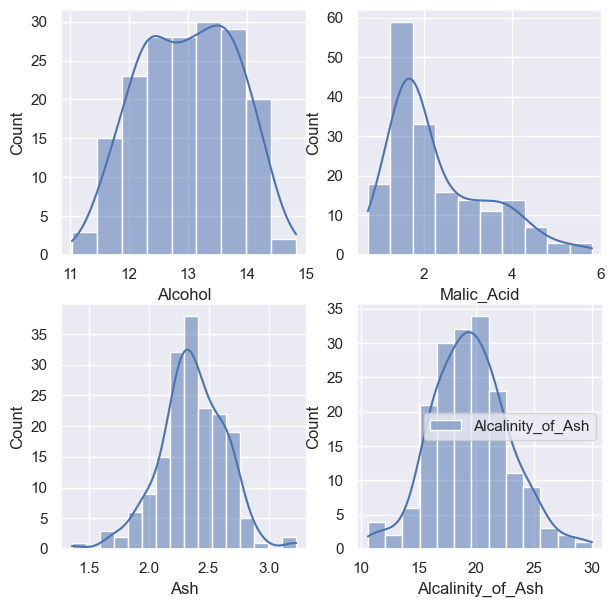

In [65]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x='Alcohol',label='Alcohol', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x='Malic_Acid', label='Malic_Acid', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x='Ash',label='Ash', kde=True, ax=axs[1, 0])
sns.histplot(data=df, x='Alcalinity_of_Ash', label='Alcalinity_of_Ash', kde=True, ax=axs[1, 1])

plt.legend() 
plt.show()

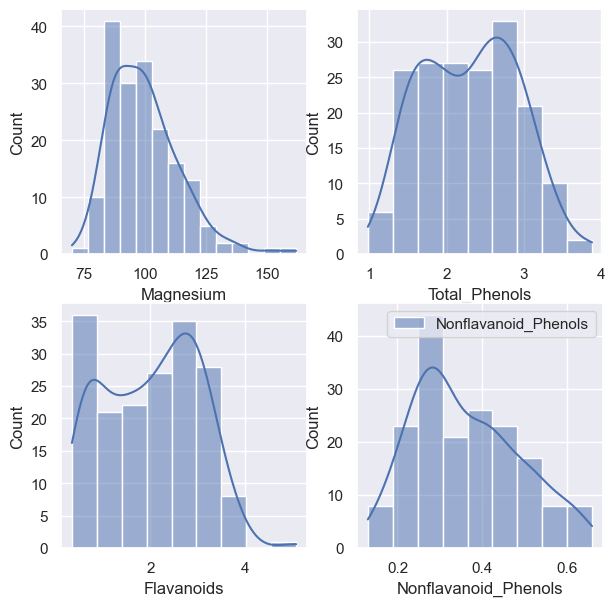

In [66]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x='Magnesium',label='Magnesium', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x='Total_Phenols', label='Total_Phenols', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x='Flavanoids',label='Flavanoids', kde=True, ax=axs[1, 0])
sns.histplot(data=df, x='Nonflavanoid_Phenols', label='Nonflavanoid_Phenols', kde=True, ax=axs[1, 1])

plt.legend() 
plt.show()

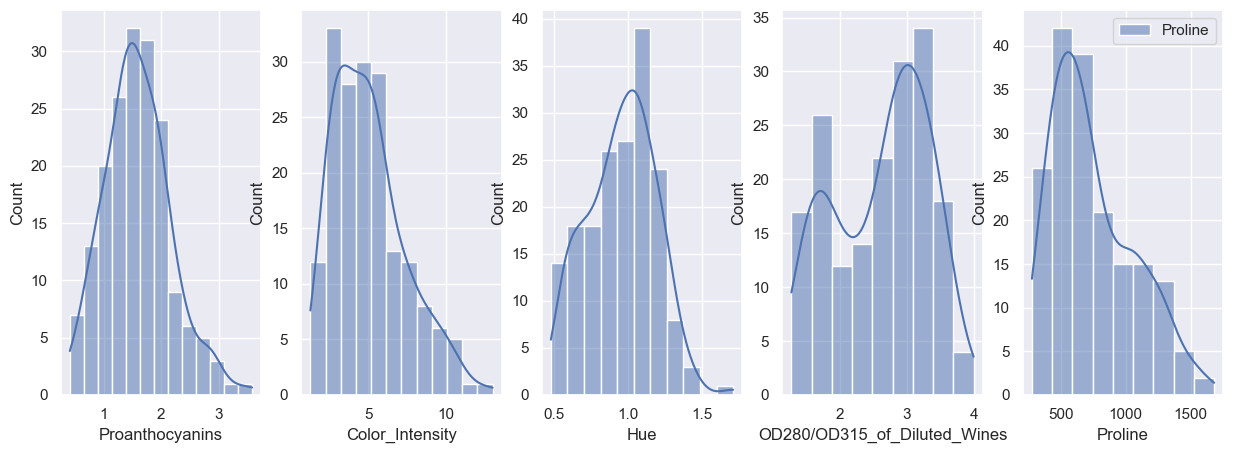

In [78]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df, x='Proanthocyanins',label='Proanthocyanins', kde=True, ax=axs[0])
sns.histplot(data=df, x='Color_Intensity', label='Color_Intensity', kde=True, ax=axs[1])
sns.histplot(data=df, x='Hue',label='Hue', kde=True, ax=axs[2])
sns.histplot(data=df, x='OD280/OD315_of_Diluted_Wines',label='OD280/OD315_of_Diluted_Wines', kde=True, ax=axs[3])
sns.histplot(data=df, x='Proline', label='Proline', kde=True, ax=axs[4])

plt.legend() 
plt.show()

## Step 2: Transform

In [86]:
# check missing values
df.isnull().sum()

Class                           0
Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280/OD315_of_Diluted_Wines    0
Proline                         0
dtype: int64

In [87]:
# convert class column from int to category
df['Class'] = df['Class'].astype('category')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Class                         178 non-null    category
 1   Alcohol                       178 non-null    float64 
 2   Malic_Acid                    178 non-null    float64 
 3   Ash                           178 non-null    float64 
 4   Alcalinity_of_Ash             178 non-null    float64 
 5   Magnesium                     178 non-null    int64   
 6   Total_Phenols                 178 non-null    float64 
 7   Flavanoids                    178 non-null    float64 
 8   Nonflavanoid_Phenols          178 non-null    float64 
 9   Proanthocyanins               178 non-null    float64 
 10  Color_Intensity               178 non-null    float64 
 11  Hue                           178 non-null    float64 
 12  OD280/OD315_of_Diluted_Wines  178 non-null    floa

In [90]:
# %pip install scikit-learn

In [91]:
# standardize the data
from sklearn.preprocessing import StandardScaler

features = df.columns[1:]  # Exclude the target 'Class'
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [92]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Diluted_Wines,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Step 3 : Load

In [96]:
df.to_csv('wine_dataset.csv', index = False)